In [200]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_halving_search_cv 
from sklearn.multioutput import MultiOutputRegressor

from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV

from sklearn.discriminant_analysis import StandardScaler

sns.set()
%matplotlib inline

np.set_printoptions(precision=3)

DISPLAY_MAX_ROWS = 20
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)
pd.set_option('display.max_column', None)
plt.style.use('seaborn-whitegrid')

warnings.filterwarnings('ignore')

In [201]:
df = pd.read_csv("data.csv")

In [202]:
df

,KS4_GPA5_Qtg.PV,KS4_GPA5_TC_T1.PV,KS4_GPA5_Nst.PV,KS4_GPA5_Nvd.PV,KS4_GPA5_Nnd.PV,KS4_GPA5_T4.PV,KS4_GPA5_Pk.PV
0,50.074285,50.656771,500.475537,1207.542773,912.161426,119.562970,51.248955
1,50.074926,50.656771,500.379883,1209.190723,914.203027,119.683643,51.255357
2,50.074836,50.666920,499.359570,1210.159082,914.924512,119.665576,51.263570
3,50.074957,50.666920,500.535840,1210.641602,915.881055,119.674750,51.267725
4,50.075145,50.666920,500.198145,1211.398438,916.435645,119.692188,51.264826
...,...,...,...,...,...,...,...
29707,50.070496,52.706500,459.827393,1238.176660,914.571973,128.579962,51.102349
29708,50.070217,52.716716,459.400806,1237.532422,913.476074,128.521655,51.102543
29709,50.070292,52.696284,459.942578,1237.783984,913.913086,128.503632,51.102639
29710,50.070389,52.675853,460.185791,1237.441895,913.895508,128.481744,51.103799


In [203]:
inputs = ['KS4_GPA5_Qtg.PV', 'KS4_GPA5_TC_T1.PV', 'KS4_GPA5_Nst.PV']  # предикторы
outputs = ['KS4_GPA5_Nvd.PV', 'KS4_GPA5_Nnd.PV', 'KS4_GPA5_T4.PV', 'KS4_GPA5_Pk.PV']  # отклики, целевые признаки

In [204]:
plt.style.use('dark_background')

### Шаг 1: Разведочный анализ данных (Exploratory Data Analysis)

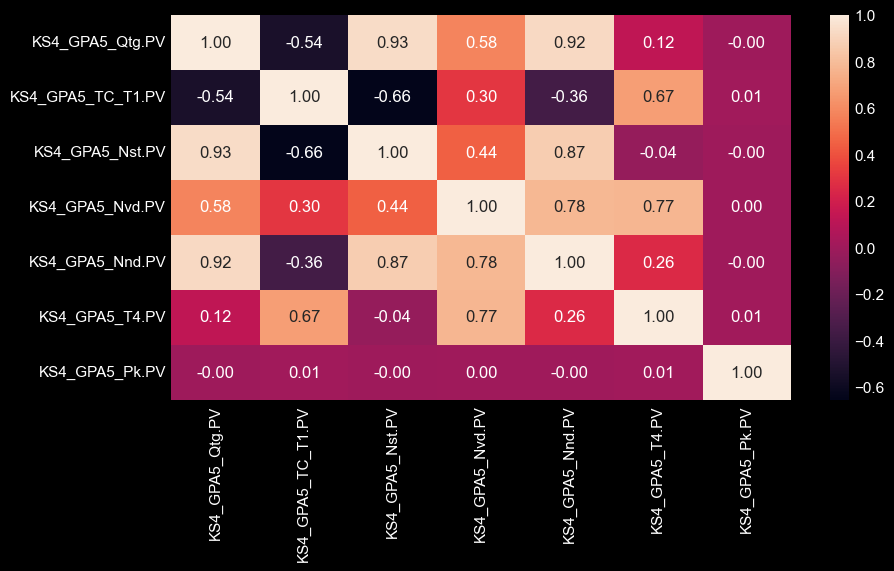

In [205]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', ax=ax)
plt.show()

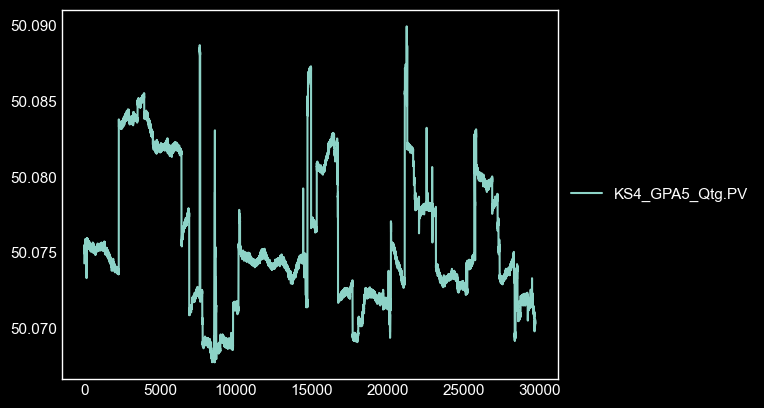

In [206]:
df['KS4_GPA5_Qtg.PV'].plot(grid=False).legend(loc='center left', bbox_to_anchor=(1, 0.5))

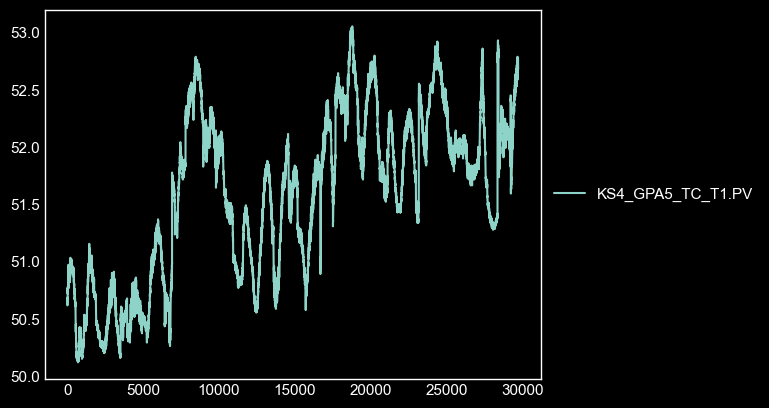

In [207]:
df['KS4_GPA5_TC_T1.PV'].plot(grid=False).legend(loc='center left', bbox_to_anchor=(1, 0.5))


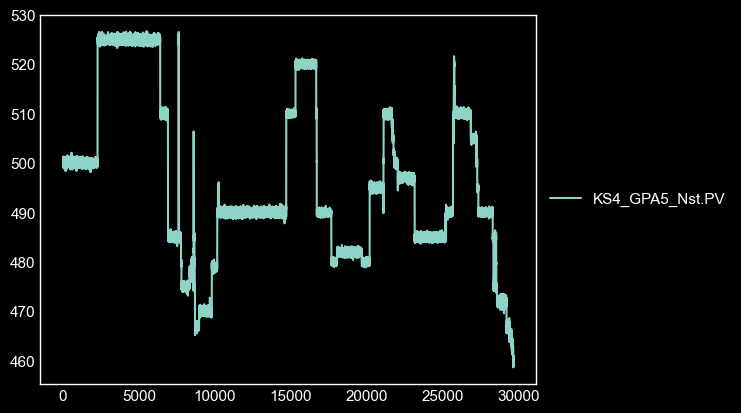

In [208]:
df['KS4_GPA5_Nst.PV'].plot(grid=False).legend(loc='center left', bbox_to_anchor=(1, 0.5))


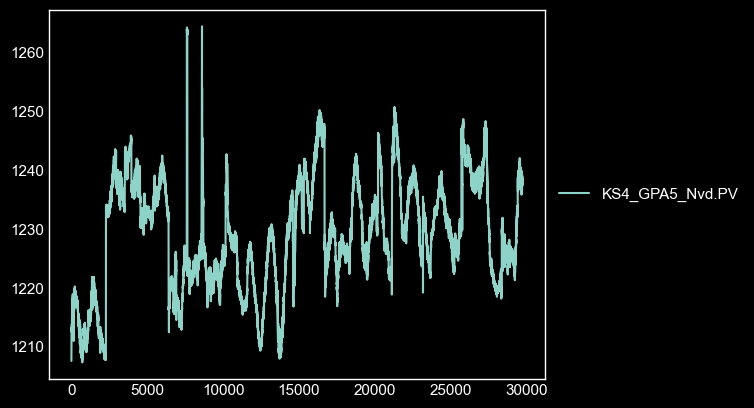

In [209]:
df['KS4_GPA5_Nvd.PV'].plot(grid=False).legend(loc='center left', bbox_to_anchor=(1, 0.5))


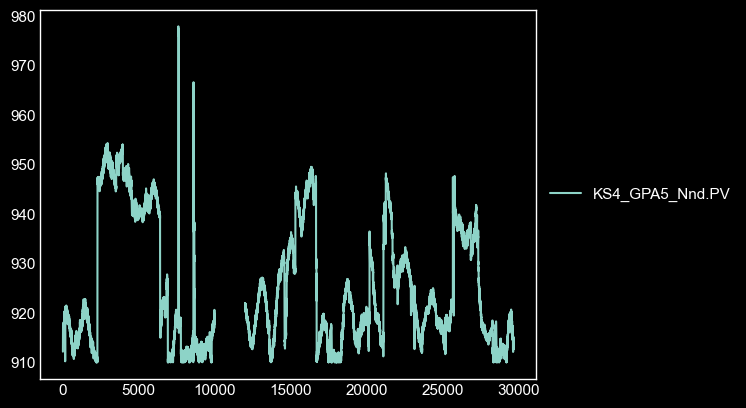

In [210]:
df['KS4_GPA5_Nnd.PV'].plot(grid=False).legend(loc='center left', bbox_to_anchor=(1, 0.5))

# есть пропуски

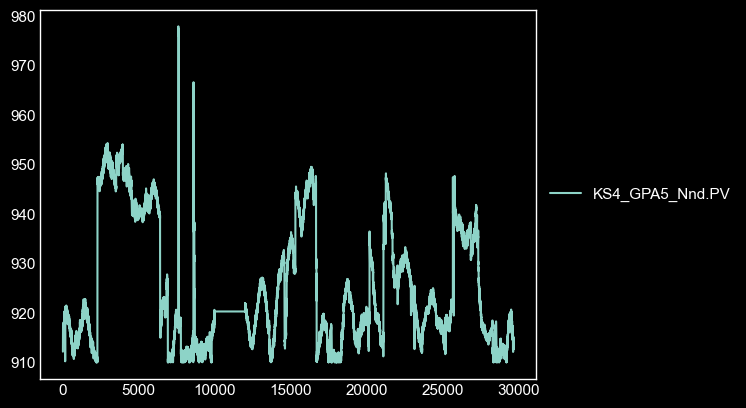

In [211]:
df['KS4_GPA5_Nnd.PV'] = df['KS4_GPA5_Nnd.PV'].fillna(df['KS4_GPA5_Nnd.PV'].median())
df['KS4_GPA5_Nnd.PV'].plot(grid=False).legend(loc='center left', bbox_to_anchor=(1, 0.5))

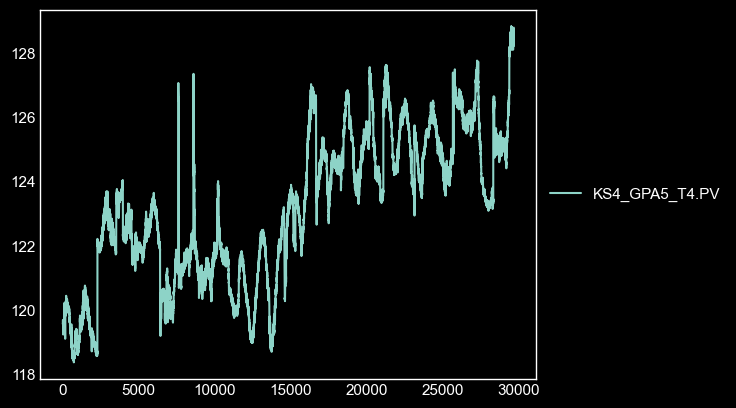

In [212]:
df['KS4_GPA5_T4.PV'].plot(grid=False).legend(loc='center left', bbox_to_anchor=(1, 0.5))

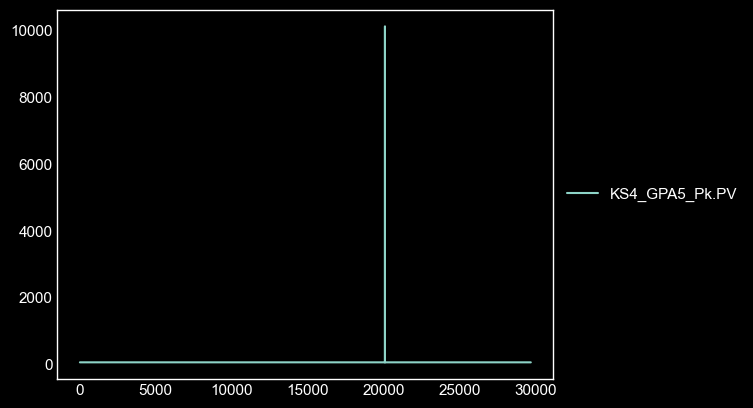

In [213]:
df['KS4_GPA5_Pk.PV'].plot(grid=False).legend(loc='center left', bbox_to_anchor=(1, 0.5))

# есть выброс

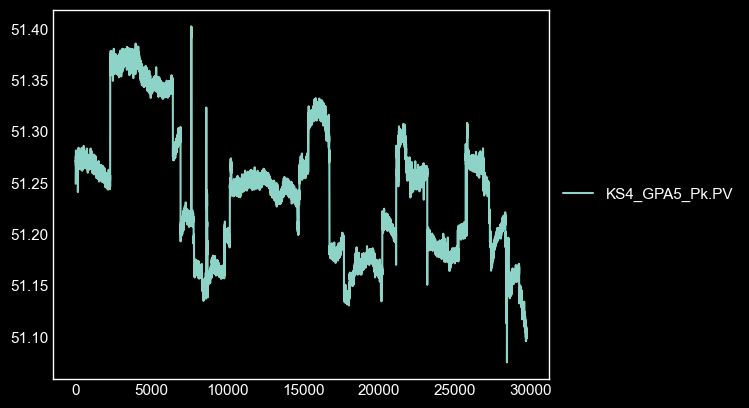

In [214]:
df = df.drop(df[df['KS4_GPA5_Pk.PV'] > 8000].index)
df['KS4_GPA5_Pk.PV'].plot(grid=False).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [215]:
x = df[inputs]
y = df[outputs]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [216]:
# Множественная линейная регрессия (baseline модель)
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
baseline_score = lr.score(x_test_scaled, y_test)
print("R2 score for Linear Regression (baseline model):", baseline_score)

R2 score for Linear Regression (baseline model): 0.8744866574284691


In [217]:
lasso = GridSearchCV(Lasso(), param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}, cv=5)
lasso.fit(x_train_scaled, y_train)
lasso_score = lasso.score(x_test_scaled, y_test)
print("R2 score for Lasso Regression:", lasso_score)

R2 score for Lasso Regression: 0.8744938196844647


In [218]:
ridge = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], cv=5)
ridge.fit(x_train_scaled, y_train)
ridge_score = ridge.score(x_test_scaled, y_test)
print("R2 score for Ridge Regression:", ridge_score)

R2 score for Ridge Regression: 0.8744888781251896


In [219]:
elasticnet = GridSearchCV(ElasticNet(), param_grid={'alpha':[0.0001, 0.001,0.01, 0.1, 1, 10],'l1_ratio':[0.01, 0.1, 0.5, 1]}, cv=5)
elasticnet.fit(x_train_scaled, y_train)
elasticnet_score = elasticnet.score(x_test_scaled, y_test)
print("R2 score for ElasticNet Regression:", elasticnet_score)

R2 score for ElasticNet Regression: 0.8744927068389152


In [220]:
tree = DecisionTreeRegressor()
param_grid_tree = {'max_features': [1, 2, 3]}
grid_tree = GridSearchCV(tree, param_grid=param_grid_tree, cv=5)
grid_tree.fit(x_train_scaled, y_train)
tree_score = grid_tree.score(x_test_scaled, y_test)
print("R2 score for DecisionTreeRegressor:", tree_score)

R2 score for DecisionTreeRegressor: 0.9875374466783571


In [221]:
svr = SVR()
multioutput_regressor = MultiOutputRegressor(svr)
param_grid_svr = {'estimator__C': [0.001, 0.01], 'estimator__gamma': [0.001, 0.01]}
grid_svr = HalvingGridSearchCV(multioutput_regressor, param_grid_svr, cv=3, verbose=2, n_jobs=-1)
grid_svr.fit(x_train_scaled, y_train)
svr_score = grid_svr.score(x_test_scaled, y_test)
print("R2 score for SVR:", svr_score)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 7922
max_resources_: 23768
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 7922
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 23766
Fitting 3 folds for each of 2 candidates, totalling 6 fits
R2 score for SVR: 0.53582275121413


In [222]:
rf = RandomForestRegressor(n_estimators=100)
param_grid_rf = {'max_features': [1, 2, 3]}
grid_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=5)
grid_rf.fit(x_train_scaled, y_train)
rf_score = grid_rf.score(x_test_scaled, y_test)
print("R2 score for RandomForestRegressor:", rf_score)

R2 score for RandomForestRegressor: 0.9928237036922554


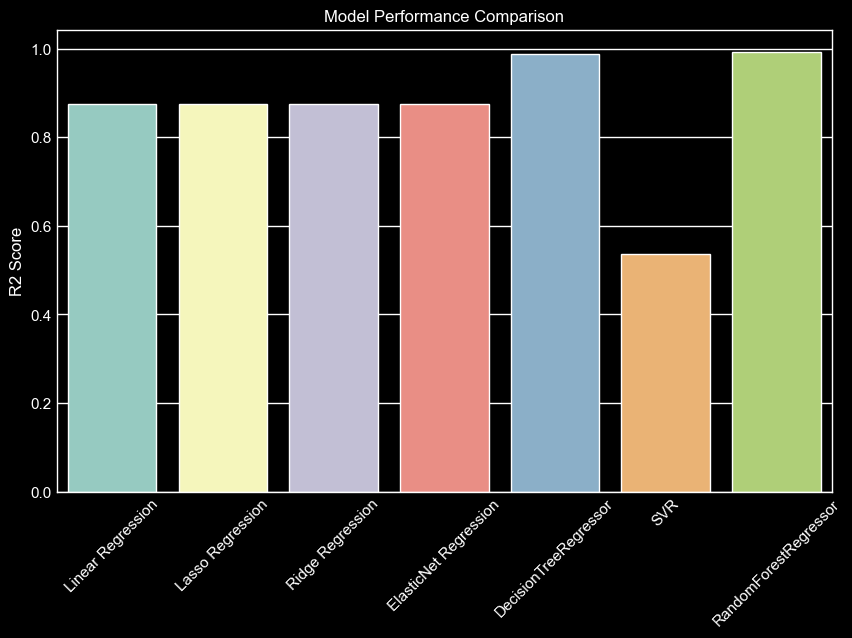

Best performing model: RandomForestRegressor


In [223]:
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression',
          'ElasticNet Regression', 'DecisionTreeRegressor', 'SVR', 'RandomForestRegressor']
scores = [baseline_score, lasso_score, ridge_score,
          elasticnet_score, tree_score, svr_score, rf_score]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=scores)
plt.ylabel('R2 Score')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()

best_model = models[np.argmax(scores)]
print("Best performing model:", best_model)